# Ejercicio 2 Prácticas LC. Curso 2020-2021
### Jaime Ferrando Huertas

In [1]:
#IMPORTS
import nltk
from nltk.corpus import cess_esp
from nltk.tag import hmm
from nltk.tag import tnt
from sklearn.model_selection import KFold
import numpy as np

nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /home/jiwidi/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

# Ejercicio 1

In [2]:
#Cargamos el corpus

corpus_sentences = cess_esp.tagged_sents()
number_sentences = len(corpus_sentences)
print("number of sentnces:", number_sentences)
print("number of words:", number_sentences)


number of sentnces: 6030
number of words: 6030


In [3]:
#Procesamos el corpus
processed_corpus = []
for sentence in corpus_sentences:
    tmp_sentence = []
    for word in sentence:
        if word[0] == "*0*":
            continue
        if word[1][0] == "v" or "F":
            new_word = (word[0], word[1][:2])
        else:
            new_word = (palabra_etiquetada[0], word[1][:1])
        tmp_sentence.append(new_word)
    processed_corpus.append(tmp_sentence)

In [4]:
#Dividimos el corpus en 90% training 10% test

len_training = int(0.9*len(processed_corpus))
training_notcv = processed_corpus[:len_training]
test_notcv = processed_corpus[len_training:]

# Ejercicio 2

In [5]:
#Entrenamos los etiquetadores morfosintacticos (modelos HMM Y TNT) en las particiones de entranimiento previamente hechas en el ejercicio 1 ya procesadas

#TNT
tagger_tnt = tnt.TnT()
tagger_tnt.train(training_notcv)
print("Precission for TNT without CV")
print(tagger_tnt.evaluate(test_notcv))

#HMM 
tagger_hmm = hmm.HiddenMarkovModelTagger.train(training_notcv)
print("Precission for HMM without CV")
print(tagger_hmm.evaluate(test_notcv))

Precission for TNT without CV
0.8241774601756736
Precission for HMM without CV
0.881048086943576


# Ejercico 3

In [8]:
%%time
#Entrenamos los etiquetadores morfosintacticos (modelos HMM Y TNT) esta vez con el metodo de cross validation con 10-Fold, primero sin barajar el dataset y despues barajandolo

#Sin barajar
results_unshuffled_tnt = []
results_unshuffled_hmm = []
kf_unshuffled = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf_unshuffled.split(processed_corpus):
    #Split data
    training_cv = np.take(processed_corpus,train_index)
    test_cv = np.take(processed_corpus,test_index)
    #TNT
    tagger_tnt = tnt.TnT()
    tagger_tnt.train(training_cv)
    results_unshuffled_tnt.append(tagger_tnt.evaluate(test_cv))
    #HMM
    tagger_hmm = hmm.HiddenMarkovModelTagger.train(training_notcv)
    results_unshuffled_hmm.append(tagger_hmm.evaluate(test_cv))


#Barajando
kf_shuffled = KFold(n_splits=10, shuffle=True)
results_shuffled_tnt = []
results_shuffled_hmm = []
for train_index, test_index in kf_shuffled.split(processed_corpus):
    #Split data
    training_cv = np.take(processed_corpus,train_index)
    test_cv = np.take(processed_corpus,test_index)
    #TNT
    tagger_tnt = tnt.TnT()
    tagger_tnt.train(training_cv)
    results_shuffled_tnt.append(tagger_tnt.evaluate(test_cv))
    #HMM
    tagger_hmm = hmm.HiddenMarkovModelTagger.train(training_notcv)
    results_shuffled_hmm.append(tagger_hmm.evaluate(test_cv))



CPU times: user 16min 3s, sys: 916 ms, total: 16min 4s
Wall time: 16min 4s


## Ejercico 4
### Creamos las tablas necesarias para el report

### Unshuffled

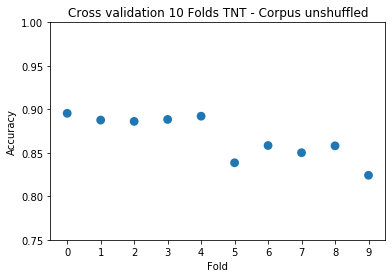

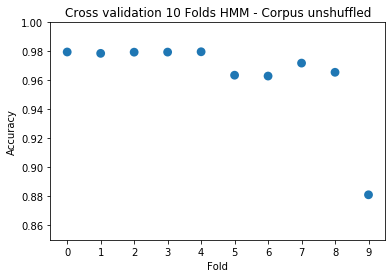

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.pointplot(list(range(10)),results_unshuffled_tnt,join=False)
ax.set_title('Cross validation 10 Folds TNT - Corpus unshuffled')
ax.set(xlabel="Fold", ylabel = "Accuracy")
ax.set(ylim=(0.75,1))
ax.get_figure().savefig("cv_tnt_unshuffled.png")
plt.show()

ax = sns.pointplot(list(range(10)),results_unshuffled_hmm,join=False)
ax.set_title('Cross validation 10 Folds HMM - Corpus unshuffled')
ax.set(xlabel="Fold", ylabel = "Accuracy")
ax.set(ylim=(0.85,1))
ax.get_figure().savefig("cv_hmm_unshuffled.png")
plt.show()



Podemos observar como para nuestros dos etiquetadores (TNT y HMM) obtienen una mejor accuracy media con cross validation que en el primer ejercicio donde tenian valores peores (TNT: 0.82, HMM: 0.88). El haber evaluado con cross validation (sin barajar) tambien nos da la oportunidad de ver como se distribuye el error de nuestro etiquetador a lo largo del dataset, vemos como el ultimo 10% del dataset es el punto con peor accuracy para los dos etiquetadores y creemos que esto se debe a que contiene muestras no tan cercanas al 90% inicial de los datos y por lo tanto el etiquetador no puede aprender sobre este nuevo tipo de muestras.



### Shuffled

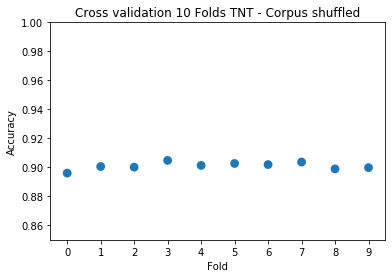

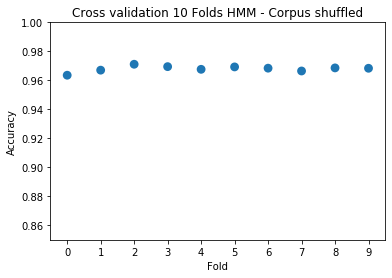

In [16]:
ax = sns.pointplot(list(range(10)),results_shuffled_tnt,join=False)
ax.set_title('Cross validation 10 Folds TNT - Corpus shuffled')
ax.set(xlabel="Fold", ylabel = "Accuracy")
ax.set(ylim=(0.85,1))
ax.get_figure().savefig("cv_tnt_shuffled.png")
ax.set(ylim=(0.85, 1))
plt.show()

ax = sns.pointplot(list(range(10)),results_shuffled_hmm,join=False)
ax.set_title('Cross validation 10 Folds HMM - Corpus shuffled')
ax.set(xlabel="Fold", ylabel = "Accuracy")
ax.set(ylim=(0.85,1))
ax.get_figure().savefig("cv_hmm_shuffled.png")
plt.show()

Sin embargo si barajamos el dataset nos libramos de este inconveniente ya que teoricamente todas las muestras tienen una representacion equitativa en todos los Folds de cross validation, esto se refleja en las dos ultimas graficas donde vemos un error similar durante todos los folds de nuestro cross validation